# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scipy
from scipy.stats.mstats import zscore
import statsmodels.api as sm
df = pd.read_csv('data/human_body_temperature.csv')

In [15]:
#Problem 1
temp = df['temperature']
scipy.stats.normaltest(temp)

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

The p-value we obtained is .258 which is > .05. Therefore the temperature is a normal distribution. To further our analysis we will plot the data in a histogram and construct a quantile plot.

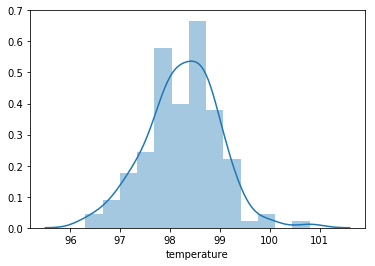

In [17]:
sns.distplot(temp)

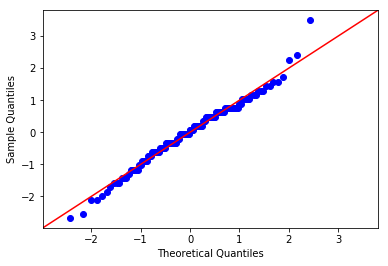

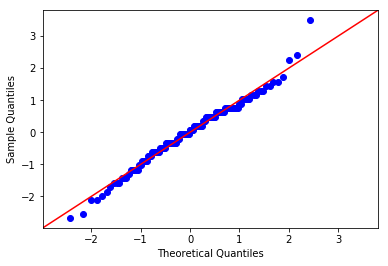

In [18]:
zscores = zscore(temp)
sm.qqplot(zscores, line='45')

From the histogram and normallity quantile plots above, the distribution is normal.  We conclude there is enough evidence to show that the sampled distribution is normal and therefore representative of the population.

In [12]:
#Problem 2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


The sample size is large with 130 samples and we can also safely assume the observations are independent.

For this test H0: mean = 98.6 H1: mean =/= 98.6. The pvalue for the 1 sample t-test is 2.4 * 10e-7 which is much less than .05 therefore we reject our null hypothesis and the true population mean is not 98.6 degrees.

In [82]:
#Problem 3 
true_mean = 98.6
sample_mean = df['temperature'].mean()
sample_std = df['temperature'].std()
sigmax = sample_std/np.sqrt(len(df)) #sigma/square root(n)
sample_mean, sample_std, sigmax

(98.24923076923078, 0.7331831580389454, 0.06430441683789101)

In [83]:
#Z-Test
z = (true_mean-sample_mean)/sigmax
z

5.454823292364079

In [84]:
p = (1-scipy.norm.cdf(z))*2
p

4.902157013653152e-08

The p-value is incredibly small so we reject the null hypothesis.
Therefore the true population mean is not 98.6F. We used a one-sample test because we are comparing the sample mean to a known value and trying to find if the true mean temperature of humans is 98.6F
We used the z-statistic because the sample size is > 30 meaning we can use the central limit theorem.

What have we found so far?
1. The p-value is extremely small therefore we can reject the null
2. the sample size is > 30 so using the z-statistic is more appropriate
3. One sample test is better suited to our study since we are only comparing the sample mean to the population mean
4. This is a two sided test because we are interested in knowing the p-value on both sides of the tail.


In [85]:
t = z 
(1-scipy.t.cdf(t,len(df)-1))*2

2.4106320428707306e-07

The p-value obtained from the t-statistic test is also very small and < .055 therefore the null hypothesis rejected and we come to same conclusion we arrived at using the z test and all the same conclusions we arrived at before hold true.

In [86]:
#Problem 5
#Abnormal temperature we will use a confidence interval of 95% any
#value that lies outside of our 95% confidence interval will be
#considered abnormal.


In [90]:
z0 = scipy.norm.ppf(.975)
upper_limit = sample_mean + z0*sigmax
lower_limit = sample_mean - z0*sigmax
lower_limit, upper_limit

(98.12319642818166, 98.3752651102799)

We can conclude that any body temperature below 98.123 and above 98.375 is considered abnormal.

In [91]:
#Problem 6
male = df[df['gender'] == 'M']
female = df[df['gender']=='F']
len(male), len(female)

(65, 65)

In [93]:
#Separate into male and female temperatures
male_temp = male['temperature']
female_temp = female['temperature']


In [94]:
#Calculate mean and standard deviation
male_mean = male_temp.mean()
male_std = male_temp.std()
male_mean, male_std

(98.1046153846154, 0.6987557623265908)

In [95]:
female_mean = female_temp.mean()
female_std = female_temp.std()
female_mean, female_std

(98.39384615384613, 0.7434877527313665)

From our above calculations the mean and standard deviations of male and females are not technically the same difference of ~.3 so we need to do further testing.

In [96]:
#Null Hypothesis: True mean of men and women are the same.
#Alternative Hypothesis True mean temp for men and women are not the same
#We set an alpha level of .05 assumption that Null is true.
h0 = 0
mean_diff = female_mean - male_mean
sigma_diff = np.sqrt((female_std**2)/65+(male_std**2)/65)
mean_diff, sigma_diff

(0.289230769230727, 0.12655395041982642)

In [97]:
#calculate z score/value
z = (mean_diff-h0)/sigma_diff
z

2.285434538165274

In [98]:
#calculate p-value
p = (1-scipy.norm.cdf(z))*2
p

0.022287360760677277

The p-value is .02 which < .05 therefore we reject the null hypothesis and accept the alternative hypothesis that the mean temps of males and females are significantly different.

Conclusions
1. Distribution of human temperatures is normal
2. Human temperatures are statistically independent
3. We can be confident that the mean temperature of the human body is not 98.6F done by calculating the z-statistic
4. The Z-Statistic and T-Statistics yielded similar results for us
5. The difference in male and female body temps is statistically significant.